## 15.三数之和
20200818

暴力搜索、优化的暴力搜索、双指针法


### 暴力搜索

1. 不重复的三次遍历
2. ans中结果不重复
3. 时间复杂度$O(n^3)$

In [22]:
def threeSum(nums):
#     nums.sort()
    ans = []
    for a in range(len(nums)):
#         print(f'a={nums[a]}')
        for b in range(a+1, len(nums)):
#             print(f'b={nums[b]}')
            for c in range(b+1, len(nums)):
                if nums[a]+nums[b]+nums[c]==0:
                    lista = [nums[a], nums[b], nums[c]]
                    lista.sort()
                    if lista not in ans:
                        ans.append(lista)
#                     ans.append([nums[a], nums[b], nums[c]])
    return ans
    

### 双指针
1. 利用有序数组的顺序遍历
2. 时间复杂度$O(n^2)$

In [46]:
def threeSum(nums):
    nums.sort()
    ans = []
    for a in range(len(nums)):
        left, right = a+1, len(nums)-1
        while left < right:
#             print(f'left, right = {left}, {right}')
            if nums[left]+nums[right] < nums[a]*(-1):
                left += 1
            elif nums[left]+nums[right] > nums[a]*(-1):
                right -= 1
            else:
                lista = [nums[a], nums[left], nums[right]]
                if lista not in ans:
                    ans.append(lista)
#                 break  # break方法无法全部遍历
                left += 1
                right -= 1
    return ans
    

### 优化的双指针
1. 去重
2. 去除不可能的方案

In [57]:
def threeSum(nums):
    nums.sort()
    ans = []
    for a in range(len(nums)):
        if nums[a] > 0: return ans  # 去除不可能的方案
        if a > 0 and nums[a] == nums[a-1]:continue  # 去重
        left, right = a+1, len(nums)-1
        while left < right:
#             print(f'left, right = {left}, {right}')
            if nums[left]+nums[right] < nums[a]*(-1):
                left += 1
            elif nums[left]+nums[right] > nums[a]*(-1):
                right -= 1
            else:
                lista = [nums[a], nums[left], nums[right]]
                if lista not in ans:
                    ans.append(lista)
                while(left<right and nums[left]==nums[left+1]):  # 去重
                    left += 1
                while(left<right and nums[right]==nums[right-1]):  # 去重
                    right -= 1
                left += 1
                right -= 1
    return ans
    

In [58]:
nums = [-1, 0, 1, 2, -1, -4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

## 盛水最多的容器
20200819、20200831

### 暴力搜索

In [3]:
def maxArea(height):
    max_vol = 0
    for i in range(len(height)):
        for j in range(i+1, len(height)):
            vol = (j-i)*min(height[i], height[j])
            max_vol = max(max_vol, vol)
    return max_vol

### 优化的暴力搜索：反向遍历

In [29]:
def maxArea(height):
    max_vol = 0
    for i in range(len(height)):
        if height[i]<height[i-1]:continue
        for j in range(len(height)-1, i, -1):
#             print(i, j)
            if j<len(height)-2:
                if height[j]<height[j+1]:
                    continue
            vol = (j-i)*min(height[i], height[j])
            max_vol = max(max_vol, vol)
    return max_vol

### 双指针
非有序数组也可以使用双指针，利用指针实现大小比较

In [33]:
def maxArea(height):
    max_vol = 0
    left, right = 0, len(height)-1
    while left<right:
        cur_vol = (right-left)*min(height[right], height[left])
        max_vol = max(max_vol, cur_vol)
#         print(leftrightght)
        if height[left]<height[right]:
            left+=1
        else:
            right-=1
    return max_vol

In [34]:
height = [1, 8, 6, 2, 5, 4, 8, 3, 7]
maxArea(height)

0 8
1 8
1 7
1 6
1 5
1 4
1 3
1 2


49

## 33. 搜索旋转排序数组

题目要求的$O(logn)$复杂度想到二分查找的方法。

由于二分查找的前提的数组有序，因此在设置双指针开始查找之前增建一个状态的判断：左/右子数组是否为有序数组


In [14]:
class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """

        if len(nums)<=0: return None
        left, right = 0, len(nums)-1
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == nums[left]: return mid
            elif nums[mid] > nums[left]:
                if nums[left]<=target<=nums[mid]:
                    target_idx = findTarget(nums, target, left, right=mid)
                    return target_idx
                else:
                    left = mid+1
            else:
                if nums[mid]<=target<=nums[right]:
                    target_idx = findTarget(nums, target, mid+1, right)
                    return target_idx
                else:
                    right = mid+1
                
    def findTarget(self, nums, target, left, right):    
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == target:
                return mid
            elif nums[mid] > target:
                right = mid+1
            else:
                left = mid+1
        return -1


In [15]:
nums = [7,0,1,2,3,4,5,6]
target = 5
a = Solution()
a.search(nums, target)

6

## 34. 排序数组查找左右边界

与题33类似的是也是二分查找的变形。

增建的状态：
1. 找到target对象，
2. 继续在target周围搜索第一个最后一个出现target的位置

In [1]:
class Solution(object):
    def searchRange(self, nums, target):
        return [self.left_bound(nums, target), self.right_bound(nums, target)]
    
    def left_bound(self, nums, target):
        left, right = 0, len(nums)-1
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == target:
                right = mid-1
            elif nums[mid] > target:
                right = mid-1
            else:
                left = mid+1
        if nums[left]==target:
            return left
        else:
            return -1
        
    def right_bound(self, nums, target):
        left, right = 0, len(nums)-1
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == target:
                left = mid+1
            elif nums[mid] > target:
                right = mid-1
            else:
                left = mid+1
        if nums[right]==target:
            return right
        else:
            return -1

In [13]:
class Solution(object):
    def searchRange(self, nums, target):
        return [self.left_bound(nums, target), self.right_bound(nums, target)]
    
    def left_bound(self, nums, target):
        left, right = 0, len(nums)-1
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == target:
                right = mid - 1
            elif nums[mid] > target:
                right = mid - 1
            else:
                left = mid + 1
                
        if nums[left]==target:
            return left
        else:
            return -1
        
    def right_bound(self, nums, target):
        left, right = 0, len(nums)-1
        while left <= right:
            mid = (right-left)//2+left
            if nums[mid] == target:
                left = mid + 1
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1

        if nums[right]==target:
            return right
        else:
            return -1

In [14]:
nums = [5,7,7,8,8,10]
target = 8
a = Solution()
a.searchRange(nums, target)

[3, 4]

## 48. 旋转图像

20200822

trick：
1. 每一圈完成遍历：p1、p2指向顶角
2. 旋转的实现：$matrix[p1][p1+a] = matrix[p2-a][p1]$...
3. 一圈完成后，收缩：p1 += 1;p2 -= 1

In [12]:
class Solution(object):
    def rotate(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: None Do not return anything, modify matrix in-place instead.
        """
        p1, p2 = 0, len(matrix)-1
        a = 0
        while p1 < p2:
            for a in range(0, p2-p1):
#                 print(a, matrix[p1][p1+a])
                temp = matrix[p1][p1+a]
                matrix[p1][p1+a] = matrix[p2-a][p1]
                matrix[p2-a][p1] = matrix[p2][p2-a]
                matrix[p2][p2-a] = matrix[p1+a][p2]
                matrix[p1+a][p2] = temp
            p1 += 1
            p2 -= 1
                
        return matrix

In [13]:
matrix = [
  [1,2,3],
  [4,5,6],
  [7,8,9]
]
a = Solution()
a.rotate(matrix)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

## 283. 移动零

In [2]:
class Solution(object):
    def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """
        j = 0
        for i in range(len(nums)):
            if nums[i] != 0:
                nums[j] = nums[i]
                if i != j:
                    nums[i] = 0
                j += 1
        return nums

In [3]:
nums = [1, 2, 0, 1, 0, 4]
a = Solution()
a.moveZeroes(nums)

[1, 2, 1, 4, 0, 0]

## 26. 删除排序数组的重复项

In [8]:
class Solution(object):
    def removeDuplicates(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        i = 0
        for j in range(len(nums)):
            if nums[i] != nums[j]:
                i += 1
                nums[i] = nums[j]
        nums = nums[:i+1]
        return i+1
    
                

In [11]:
nums = [0,0,1,1,1,2,2,3,3,4]
a = Solution()
a.removeDuplicates(nums)

5

## 55. 跳跃游戏

### 动态规划
1. 最优子解：$nums[:-1]$可以走通
2. 状态：$dp[i] = T/F$ 表示该步能否走通
3. 状态转移方程：最长步数>=最小跨越距离( 上一个可以走的通的位置-当前位置)$nums[i] >= idx-i$

In [12]:
class Solution(object):
    def canJump(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        idx = len(nums)-1
        dp = [False] * len(nums)
        for i in range(len(nums)-1, -1, -1):
            if nums[i] >= idx-i:
                idx = i
#                 print(i)
                dp[i] = True
        return dp[0]

In [13]:
nums = [2, 3, 1, 0, 4]
a = Solution()
a.canJump(nums)

True

## 56. 合并区间

### 下标运算
1. 不在原有的interval上操作：下标会乱
2. 如果大于：替换；如果小于：添加

In [22]:
class Solution(object):
    def merge(self, intervals):
        """
        :type intervals: List[List[int]]
        :rtype: List[List[int]]
        """
        if len(intervals) == 0: return []
        ans = [intervals[0]]
        res = [intervals[0]]
        for i in range(1, len(intervals)):
            ans = res[-1]
            if res[-1][1] >= intervals[i][0]:
                ans = [res[-1][0], intervals[i][1]]
                res[-1] = ans
            else:
                ans = intervals[i]
                res.append(ans)
        return res
    

In [24]:
intervals = [[1,3],[2,6],[8,10],[15,18]]
a = Solution()
a.merge(intervals)

[[1, 6], [8, 10], [15, 18]]

## 121. 买卖股票的最佳时机

### 动态规划
使用动态规划方法求解股票问题：
1. 最优子解：前一天的最大化收益dp[i-1]
2. 状态：$dp[i][k][0/1]$:i表示天数，k表示可以买入的次数，0/1表示没有持有股票/持有股票
3. 转移矩阵：$dp[i][k][0] = max(dp[i-1][k][0], dp[i-1][k][1]+prices[i])$ 
$dp[i][k][1] = max(dp[i-1][k][1], dp[i-1][k-1][1]-prices[i])$
4. 边界条件：$dp[0][k][0] = 0$, $dp[0][k][1] = -prices[0]$, $dp[i][0][0] = 0$, $dp[i][0][1] = NAN$
该题是只允许买卖一次的情况，因此k=1，将上述转移矩阵化简得：$dp[i][0] = max(dp[i-1][0], dp[i-1][1]+prices[i])$ 
$dp[i][1] = max(dp[i-1][1], -prices[i])$

In [1]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        dp = [[0]*2]*len(prices)
        dp[0][0], dp[0][1]= 0, -prices[0]
        for i in range(len(prices)):
            dp[i][0] = max(dp[i-1][0], dp[i-1][1]+prices[i])
            dp[i][1] = max(dp[i-1][1], -prices[i])
        return dp[-1][0]

In [2]:
prices = [7,1,5,3,6,4]
a = Solution()
a.maxProfit(prices)

5

### 

In [ ]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        dp = [[0]*2]*len(prices)
        dp[0][0], dp[0][1]= 0, -prices[0]
        for i in range(len(prices)):
            dp[i][0] = max(dp[i-1][0], dp[i-1][1]+prices[i])
            dp[i][1] = max(dp[i-1][1], -prices[i])
        return dp[-1][0]

In [ ]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        dp = [[0]*2]*len(prices)
        dp[0][0], dp[0][1]= 0, -prices[0]
        for i in range(len(prices)):
            dp[i][0] = max(dp[i-1][0], dp[i-1][1]+prices[i])
            dp[i][1] = max(dp[i-1][1], -prices[i])
        return dp[-1][0]

## 62. 不同路径

### 动态规划
1. 最优子解：目标点可以由该点上一点向下走一步和该点左一点向右走一步到达
2. 状态$dp[i][j]$表示该$(i, j)$坐标点路线的个数
3. 转移方程：$dp[i][j]=dp[i][j-1]+dp[i-1][j]$

In [2]:
class Solution(object):
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        dp = list()
        dp = [[1]*m] + [[1] + [0]*(m-1)]*(n-1)
        for i in range(1, n):
            for j in range(1, m):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return dp[-1][-1]

In [3]:
a = Solution()
a.uniquePaths(m=7, n=3)

28

## 79. 单词搜索

### 递归+DFS
1. 终止条件：(1)找到全部word:len(word)=0;(2)找到了边界:i/j<0/>=len(board)
2. ⚠️前面走过的点要置0
3. 递归部分self.DFS(前、后、左、右): 

⚠️完成递归主体时的顺序: 先返回内部的T/F，再返回外部的T/F

ans = self.DFS(前、后、左、右)

return ans


In [7]:
class Solution:
    def exist(self, board, word):
        if len(word) == 0: return False
        if len(board) == 0: return False
        for i in range(len(board)):
            for j in range(len(board[0])):
                if self.DFS(board, word, i, j):
                    return True
        return False
    
    def DFS(self, word, board, i, j):
        if len(word) == 0: return True
        if i<0 or i>=len(board) or j<0 or j>=len(board[0]) or board[i][j]!=word[0]: return False
        
        tmp = board[i][j]
        board[i][j] = '0'
        ans = self.DFS(word[1:], board, i+1, j) or self.DFS(word[1:], board, i-1, j) or self.DFS(word[1:], board, i, j+1) or self.DFS(word[1:], board, i, j-1)
        board[i][j] = tmp
        return ans

In [19]:
word = 'SE'
board =[
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]
a = Solution()
a.exist(word, board)

False

## 238. 除自身以外数组的乘积

### 前后累乘
利用list记录从前往后到第i个数字时的累乘积和从后往前到第i个数字时的累乘积，再对应下标相乘得到结果

时间复杂度：$O(3n)$

空间复杂度：$O(2n)$, 不算输出list占用的空间

In [24]:
class Solution(object):
    def productExceptSelf(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        n = len(nums)
        output, front, back = [1 for _ in range(len(nums))], [1 for _ in range(len(nums))], [1 for _ in range(len(nums))]
        for i in range(1, n):
            front[i] = front[i-1]*nums[i-1]
        for j in range(n-2, -1, -1):
            back[j] = back[j+1]*nums[j+1]
        for k in range(n):
            output[k] = front[k]*back[k]
        return output
            

### 优化前后累乘
优化前后累乘的方法，从而减少计算复杂度

时间复杂度：$O(2n)$

空间复杂度：$O(1)$, 不算输出list占用的空间

In [26]:
class Solution(object):
    def productExceptSelf(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        n = len(nums)
        output, front, back = [1 for _ in range(len(nums))], 1, 1
        for i in range(1, n):
            front *= nums[i-1]
            output[i] *= front
        for j in range(n-2, -1, -1):
            back *= nums[j+1]
            output[j] *= back
        
        return output
            

In [27]:
nums = [1, 2, 3, 4]
a = Solution()
a.productExceptSelf(nums)

[24, 12, 8, 6]

## 380. 常数时间插入、删除和获取随机元素

dict的哈希查找实现$O(1)$查找，使用list的pop()末尾元素

In [1]:
from random import choice


class RandomizedSet(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.dicta = {}
        self.lista = []


    def insert(self, val):
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        :type val: int
        :rtype: bool
        """
        if val in self.lista: return False
        self.dicta[val] = len(self.lista)
        self.lista.append(val)
        return True
       


    def remove(self, val):
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        :type val: int
        :rtype: bool
        """
        if val not in self.lista: return False
        tar_idx = self.dicta[val]
        self.dicta[self.lista[-1]] = tar_idx
        self.lista[-1], self.lista[tar_idx] = self.lista[tar_idx], self.lista[-1]
        self.lista.pop()
        del self.dicta[val]
        return True


    def getRandom(self):
        """
        Get a random element from the set.
        :rtype: int
        """
        return choice(self.lista)



In [3]:
# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()
a = RandomizedSet()
p1 = a.insert(1)
p2 = a.insert(2)
p3 = a.remove(2)
p4 = a.getRandom()
print(p1, p2, p3, p4)

True True True 1


## 55. 跳跃游戏

## 287. 寻找重复数字

### hash查找
时间复杂度：$O(1)$

空间复杂度：$O(n)$

满足小于$O(n^2)$的时间复杂度，但空间复杂度不满足$O(1)$

### 排序

nums.sort()

内部实现机制为：Timesort:https://www.cnblogs.com/clement-jiao/p/9243066.html/

时间复杂度：$O(nlogn)$

空间复杂度：$O(n)$

满足小于$O(n^2)$的时间复杂度，但空间复杂度不满足$O(1)$

### 二分法
时间复杂度：$O(nlogn)$

空间复杂度：$O(1)$

count[i]表示在nums中数值小于等于i的元素个数。

由于nums分布为[1,n]，易得在[1,target-1]里所有的数满足count[i]<=i;[target,n]里所有的数满足count[i]>i,且具有单调性。

因此，有以下结论：任意一个nums中的元素，通过计算其count[i]可以用于判断该数i与target的关系。本结论用于二分法中取左/右半部的条件判断依据？？？

In [ ]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        left = 1
        right = len(nums) - 1
        while(left<right):
            mid=(left+right)//2
            count=0
            for num in nums:
                if(num<=mid):
                    count+=1
            if(count<=mid):
                left=mid+1
            else:
                right=mid
        return left


### 快慢指针
快慢指针的应用：https://zhuanlan.zhihu.com/p/20702303 & https://www.csdn.net/gather_28/MtjaIgxsMjU3NjgtYmxvZwO0O0OO0O0O.html

时间复杂度：$O(nlogn)$

空间复杂度：$O(n)$

由于n+1个数字分布在[1,n]，则可以将nums转换为环形链表，重复的数字表示环的入口。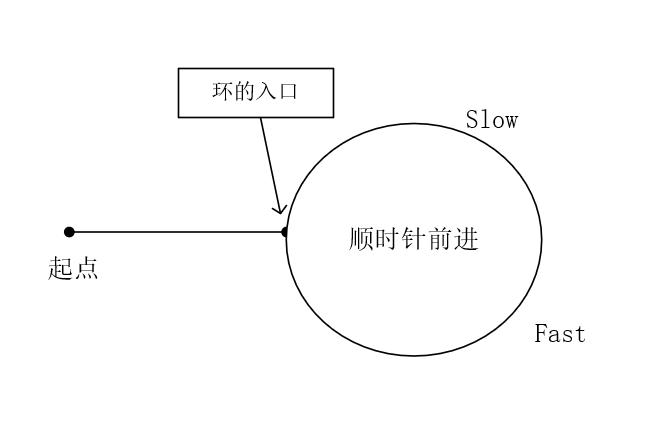

？？？多个数字重复时结果怎么样

In [5]:
class Solution(object):
    def findDuplicate(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        slow, fast = 0, 0
        while True:
            slow = nums[slow]
            fast = nums[nums[fast]]
            if fast == slow:
                break
        
        finder = 0
        while True:
            slow = nums[slow]
            finder = nums[finder]
            if finder == slow:
                return finder


In [6]:
nums = [3,1,3,4,2]
a = Solution()
a.findDuplicate(nums)

3

## 162. 寻找峰值

In [9]:
class Solution:
    def findPeakElement(self, nums):
        l=0
        r=len(nums)-1
        while(l<r):
            mid=(l+r)//2
            if(nums[mid]>nums[mid+1]):
                r=mid
            else:
                l=mid+1
        return l

In [10]:
nums = [1,2,1,3,5,6,4]
a = Solution()
a.findPeakElement(nums)

5